# Exploratory Analysis

The two datasets provided are related to **handwritten digit image recognition (MNIST)**, which is a classic computer vision problem. The **train** dataset consists of **42,000 images**, while the **test** dataset contains **28,000 images**.

Each image has a size of 28x28 pixels and each pixel has a **value between 0 and 255 which represents the light intensity**. The train dataset contains a "label" column representing the digit corresponding to the image (from 0 to 9), while the test dataset does not have this column since the goal is to predict the corresponding digit for each image.
The **goal of the project** will be to **train a machine learning model** on the train dataset and use it to **predict the figures** corresponding to the images of the test dataset.

This session will be dedicated to the **exploratory analysis** of this dataset to better understand the nature of the data available to us, trying to identify any patterns or relationships between the variables. 
The exploratory analysis will allow us to extract **significant information** from our dataset and to identify any problems or challenges that may arise in the modeling phase.

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns



Importing train and test CSV

In [3]:
filename1 = 'train.csv'
filename2 = 'test.csv'
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("Upload in Colab ",filename1, filename2)
    from google.colab import files
    # if you are running in Colab, the line below will open a dialog
    # then you must choose 'foo.csv' in your local filesystem
    uploaded = files.upload()
    # now 'foo.csv' is available in your Colab environment

Upload in Colab  train.csv test.csv


Saving test.csv to test.csv


Reading the files and printing the head of both datasets

In [4]:
train = pd.read_csv("train (1).csv")
test = pd.read_csv("test.csv")
print(train.head())
print(test.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

Checking the size of the datasets. 






In [5]:
print("Size of the train set:", train.shape)
print("Size of the test set:", test.shape)


Size of the train set: (42000, 785)
Size of the test set: (28000, 784)




*   The train set has 42000 rows and 785 columns
*  The test set has 28000 rows and 784 columns

The two datasets differ by one column since the **test set does not contain the column of the labels** that are the object of the prediction


Checking if there are **null values** in the datasets (no null values in both of them)

In [7]:
print("Null vaulues inside the train dataset are:", train.isnull().any().sum())
print("Null vaulues inside the test dataset are:",test.isnull().any().sum())


Null vaulues inside the train dataset are: 0
Null vaulues inside the test dataset are: 0


Qick look at one digit

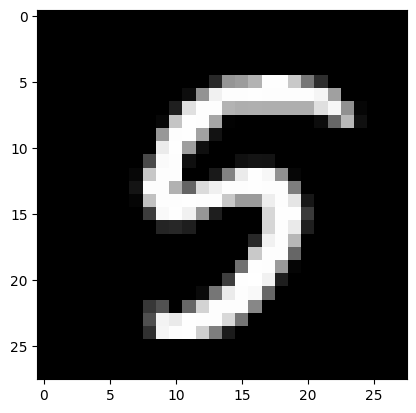

In [8]:
digit = np.array(train.iloc[8, 1:]).astype(float).reshape(28, 28) # look at one digit
plt.imshow(digit, cmap='gray')
plt.show()

Checking the distribution of variables in the train set

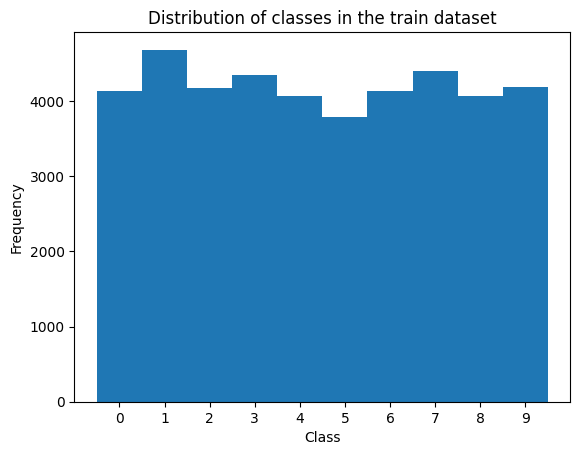

In [9]:
train["label"].value_counts().sort_index()
plt.hist(train["label"], bins=range(11), align="left")
plt.xticks(range(10))
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of classes in the train dataset")
plt.show()

As can be seen from the graph, **the labels of the train set are well balanced**. There are no labels that are grossly dominant over others, just as there are no labels that are in the minority.

If a train test has labels distributed unbalanced, several problems can arise during training and evaluation of the model:

1.   **Classification Problems**: A model trained on an unbalanced dataset tends to correctly predict majority classes, but may have difficulty correctly predicting minority classes. 
2. **Overfitting** : The model would not be able to generalize to new data. 
3.   **Evaluation bias**: The model evaluation could be misleading. 



 **Average value of pixels for different digits.**

Investigating the average intensity, which refers to the average value of a pixel in an image for different digits. 
We hypothesize that the digit "1" would have less intensity on average than, say, an "8"

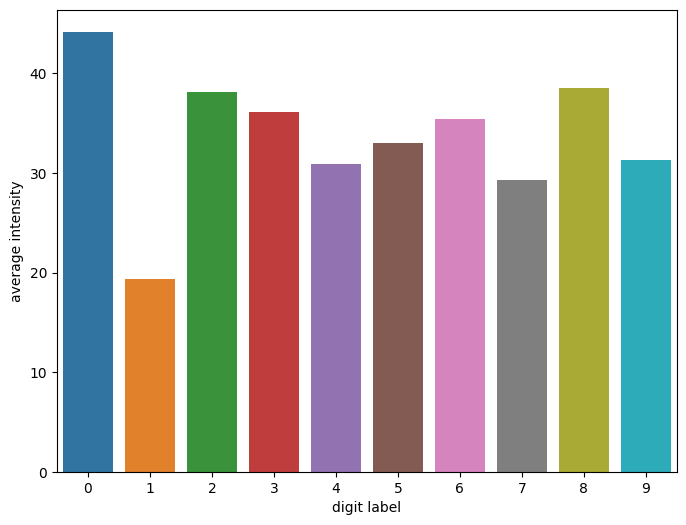

In [10]:
train['intensity'] = train.iloc[:, 1:].mean(axis=1)

intbylabel = train.groupby('label')['intensity'].mean().reset_index()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='label', y='intensity', data=intbylabel)
plt.xlabel('digit label')
plt.ylabel('average intensity')
plt.show()


We can noticed that there are variations in the brightness of the digits. 
For example the **digit "1" is the less bright**, while **digit "0" is the brightest**. This feature could be useful for predicting whether a digit is "1" or not. 
However, **people have different ways of writing their digits**, which could affect the intensity. 
To better understand this, we can create a graph that shows the **distribution of the average intensity** based on the label of each digit. 

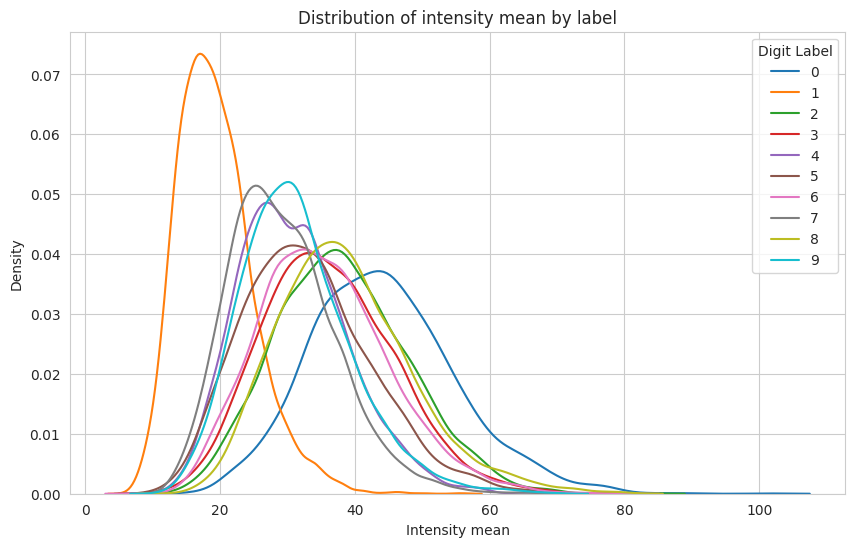

In [21]:
# Compute the intensity mean for each label
intbylabel = train.groupby('label')['intensity'].mean()

# Create a figure with a plotting area
fig, ax = plt.subplots(figsize=(10, 6))

# Create a density plot for each label
for label in range(10):
    sns.kdeplot(train[train['label']==label]['intensity'], ax=ax, label=str(label))

# Title and axis labels
ax.set_title('Distribution of intensity mean by label')
ax.set_xlabel('Intensity mean')
ax.set_ylabel('Density')

# Add legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Digit Label', loc='upper right')

# Show the plot
plt.show()



The plots above show that the **intensity** distributions of most digits are roughly **normally distributed**, **but some have higher variability than others**. The digit "1" appears to be the most consistently written digit across all samples. However, overall the intensity feature does not seem to be particularly useful. To investigate further, we will plot histograms for selected digits

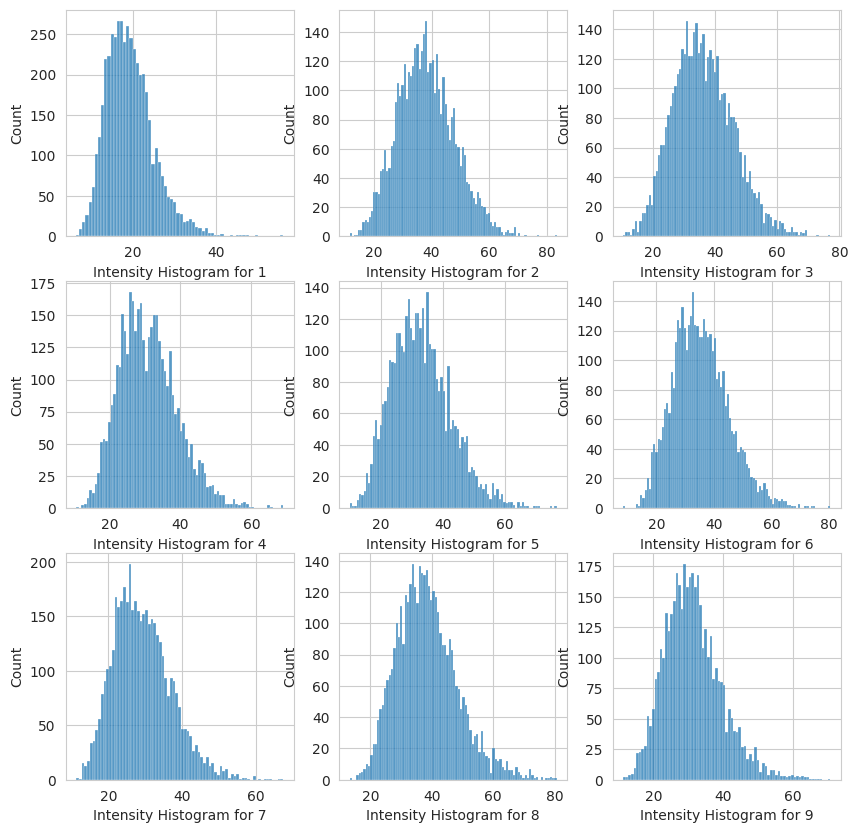

In [24]:
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(10, 10))
gs = GridSpec(3, 3, figure=fig)

sns.histplot(train[train['label']==1]['intensity'], ax=fig.add_subplot(gs[0, 0]), binwidth=0.75).set(xlabel="Intensity Histogram for 1")
sns.histplot(train[train['label']==2]['intensity'], ax=fig.add_subplot(gs[0, 1]), binwidth=0.75).set(xlabel="Intensity Histogram for 2")
sns.histplot(train[train['label']==3]['intensity'], ax=fig.add_subplot(gs[0, 2]), binwidth=0.75).set(xlabel="Intensity Histogram for 3")
sns.histplot(train[train['label']==4]['intensity'], ax=fig.add_subplot(gs[1, 0]), binwidth=0.75).set(xlabel="Intensity Histogram for 4")
sns.histplot(train[train['label']==5]['intensity'], ax=fig.add_subplot(gs[1, 1]), binwidth=0.75).set(xlabel="Intensity Histogram for 5")
sns.histplot(train[train['label']==6]['intensity'], ax=fig.add_subplot(gs[1, 2]), binwidth=0.75).set(xlabel="Intensity Histogram for 6")
sns.histplot(train[train['label']==7]['intensity'], ax=fig.add_subplot(gs[2, 0]), binwidth=0.75).set(xlabel="Intensity Histogram for 7")
sns.histplot(train[train['label']==8]['intensity'], ax=fig.add_subplot(gs[2, 1]), binwidth=0.75).set(xlabel="Intensity Histogram for 8")
sns.histplot(train[train['label']==9]['intensity'], ax=fig.add_subplot(gs[2, 2]), binwidth=0.75).set(xlabel="Intensity Histogram for 9")

plt.show()


As we can see the digits as 4 have a less normal distribution than the digit 1 for example.
This can be because people tend to write this number in different ways. Let's see if this hypotesis is correct or not by visualizing some of the images of digit 4.

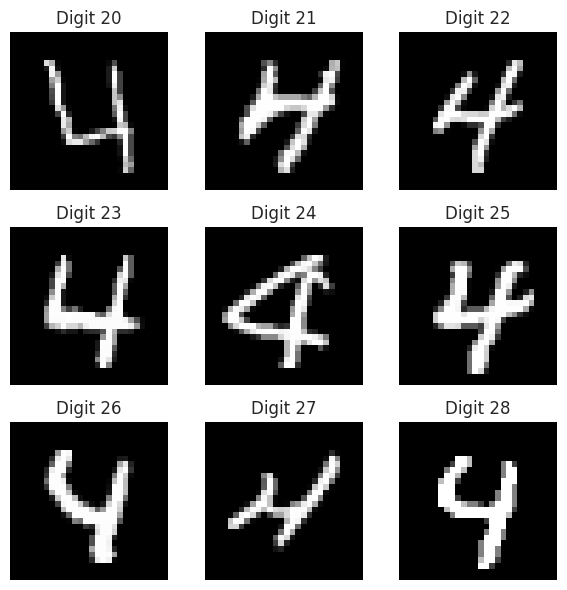

In [27]:
train4 = train[train['label'] == 4]

def flip(matrix):
    return np.apply_along_axis(lambda x: x[::-1], axis=1, arr=matrix)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(6, 6))

for i, ax in enumerate(axes.flat):
    digit = flip(np.matrix(train4.iloc[i, 1:-1]).reshape(28, 28))
    ax.imshow(digit, cmap='gray')
    ax.set_title(f'Digit {i+20}')
    ax.axis('off')

plt.tight_layout()
plt.show()


As we can see, some people write the number 4 by "closing" the digit, while others write it leaving the upper part open. This explains the variability of this digit

Calculation of the **correlation matrix** between the pixels
This type of analysis can be useful to understand how pixels are correlated with each other and identify any pixels that do not contribute significantly to the classification of images but may increase the size of the dataset and the processing time of the models.

/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/usr/local/lib/python3.9/dist-packages/numpy/lib/function_base.py:2830: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


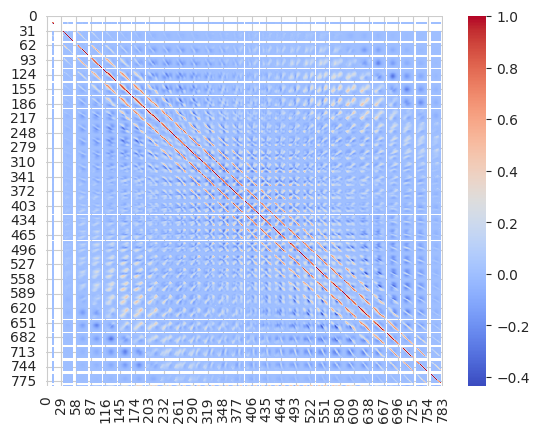

In [28]:
train_pixels = train.iloc[:, 1:].to_numpy()
corr_matrix = np.corrcoef(train_pixels, rowvar=False)
sns.heatmap(corr_matrix, cmap="coolwarm")
plt.show()


The **heat map** represents the c**orrelation matrix** between the various features of the train dataset.
**The correlation value** between the feature corresponding to the row and that corresponding to the column is between -1 and 1.

In this case the features are **not related to each other**. This suggests that the features are independent of each other.
However, there are **some pairs of features that show a positive correlation** (e.g. horizontally or vertically adjacent pixels), but most of the correlations are weak or even negative.

The diagonal of the matrix represents the correlation of a feature with itself which is always 1.from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

# PCA Analysis
During the exploration phase of the MNIST dataset, we performed various visualization methods, such as the boxplot, to try to identify any patterns or differences between the represented figures. 
However, with so much data, **most of the graphs turned out to be difficult to read and not very useful** for drawing meaningful conclusions. 
For this reason, **we decided to perform a principal component analysis (PCA) to reduce the dimensionality of the data** and trying to identify any hidden patterns.

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


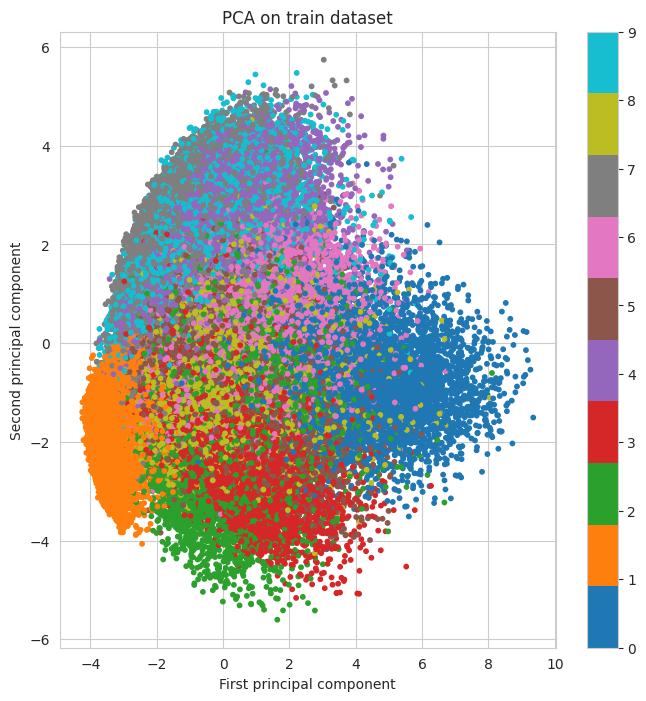

In [29]:
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

mnist = fetch_openml('mnist_784', version=1, cache=True)

# Data normalization
X = mnist.data / 255.0

# PCA execution
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=mnist.target.astype(int), s=10, cmap='tab10')
plt.colorbar()
plt.title('PCA on train dataset')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [30]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=2)
pca.fit(X)
variance_ratio = pca.explained_variance_ratio_
variance_explained = np.sum(variance_ratio)
print("Variance_explained of the first two components is:", variance_explained)

Variance_explained of the first two components is: 0.16901560500641735


The resulting output indicates the proportion of variability in the data that can be explained by the first two principal components. In this case, **the variance explained is 0.169**, which suggests that **the two principal components only capture a small amount of the overall variability** in the data. 
